In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
data = pd.read_csv("layoffs_data.csv", encoding = "latin-1")
data.head(3)

,ï»¿Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2024-02-29 23:35:20,United States,NaN,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2024-02-29 00:45:00,United States,670.0,Unknown
2,Vacasa,Portland,Travel,0.05,2024-02-28,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2024-02-29 17:22:37,United States,320.0,Unknown


In [30]:
# Extracting Year from Date
data['Year']=pd.DatetimeIndex(data['Date']).year
data.head(3)

,ï»¿Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,Year
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2024-02-29 23:35:20,United States,NaN,Unknown,2024
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2024-02-29 00:45:00,United States,670.0,Unknown,2024
2,Vacasa,Portland,Travel,0.05,2024-02-28,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2024-02-29 17:22:37,United States,320.0,Unknown,2024


In [33]:
data['Month']=pd.DatetimeIndex(data['Date']).month
data.head(3)

,ï»¿Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,Year,Month
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2024-02-29 23:35:20,United States,NaN,Unknown,2024,2
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2024-02-29 00:45:00,United States,670.0,Unknown,2024,2
2,Vacasa,Portland,Travel,0.05,2024-02-28,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2024-02-29 17:22:37,United States,320.0,Unknown,2024,2


In [123]:
month_to_quarter = {
    1: 1, 2: 1, 3: 1,  # January, February, March -> Quarter 1
    4: 2, 5: 2, 6: 2,  # April, May, June -> Quarter 2
    7: 3, 8: 3, 9: 3,  # July, August, September -> Quarter 3
    10: 4, 11: 4, 12: 4  # October, November, December -> Quarter 4
}
data['Quarter'] = data['Month'].map(month_to_quarter)
data.head(3)

,ï»¿Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,Year,Month,Quarter,Funds_Saved
0,Fisker,Los Angeles,Transportation,0.15,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layof...,1700.0,Post-IPO,2024-02-29 23:35:20,United States,NaN,Unknown,2024,2,1,NaN
1,Electronic Arts,SF Bay Area,Consumer,0.05,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-com...,2.0,Post-IPO,2024-02-29 00:45:00,United States,670.0,Unknown,2024,2,1,1340.0
2,Vacasa,Portland,Travel,0.05,2024-02-28,https://www.oregonlive.com/business/2024/02/po...,834.0,Post-IPO,2024-02-29 17:22:37,United States,320.0,Unknown,2024,2,1,266880.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ï»¿Company                  3485 non-null   object 
 1   Location_HQ                 3485 non-null   object 
 2   Industry                    3485 non-null   object 
 3   Percentage                  2245 non-null   float64
 4   Date                        3485 non-null   object 
 5   Source                      3485 non-null   object 
 6   Funds_Raised                3115 non-null   float64
 7   Stage                       3485 non-null   object 
 8   Date_Added                  3485 non-null   object 
 9   Country                     3485 non-null   object 
 10  Laid_Off_Count              2290 non-null   float64
 11  List_of_Employees_Laid_Off  3484 non-null   object 
 12  Year                        3485 non-null   int32  
dtypes: float64(3), int32(1), object(9

In [22]:
data.describe()

,Percentage,Funds_Raised,Laid_Off_Count,Year
count,2245.000000,3115.000000,2290.000000,3485.000000
mean,0.278106,776.946387,250.860699,2022.131133
std,0.283833,4800.136787,780.128866,1.159629
min,0.000000,0.000000,3.000000,2020.000000
25%,0.100000,51.000000,40.000000,2022.000000
50%,0.170000,165.000000,80.000000,2022.000000
75%,0.300000,462.000000,185.750000,2023.000000
max,1.000000,121900.000000,12000.000000,2024.000000


In [23]:
# Number of jobs that have been laid off by February 29th

jobs_laidoff_per_year = data.groupby('Year')['Laid_Off_Count'].sum()
table = pd.DataFrame({'Year': jobs_laidoff_per_year.index, 'Count': jobs_laidoff_per_year.values})
print(table)

   Year     Count
0  2020   80998.0
1  2021   15823.0
2  2022  165269.0
3  2023  262995.0
4  2024   49386.0


In [56]:
# No.of Employees laid of each year (Quater-wise)

laid_off_per_quarter = data.groupby(['Year', 'Quarter'])['Laid_Off_Count'].sum()
laid_off_per_quarter = laid_off_per_quarter.reset_index()
laid_off_per_quarter_pivot = laid_off_per_quarter.pivot(index='Year', columns='Quarter', values='Laid_Off_Count')

# If any quarter is missing for a year, fill it with 0
for quarter in range(1, 5):
    if quarter not in laid_off_per_quarter_pivot.columns:
        laid_off_per_quarter_pivot[quarter] = 0

# Sort columns to ensure quarters are in order
laid_off_per_quarter_pivot = laid_off_per_quarter_pivot.reindex(sorted(laid_off_per_quarter_pivot.columns), axis=1)
print("Number of Jobs Laid Off for Each Quarter in Every Year:")
print(laid_off_per_quarter_pivot)


Number of Jobs Laid Off for Each Quarter in Every Year:
Quarter         1        2        3        4
Year                                        
2020       9628.0  60141.0   9690.0   1539.0
2021       7728.0   2695.0   2108.0   3292.0
2022       9909.0  35257.0  35174.0  84929.0
2023     167574.0  46433.0  25535.0  23453.0
2024      49386.0      NaN      NaN      NaN


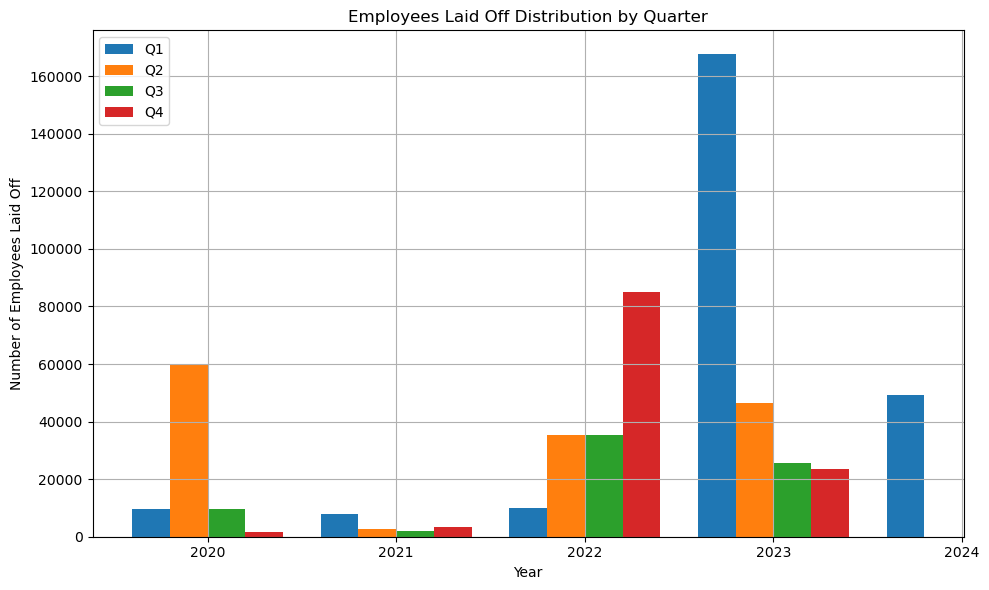

In [57]:
#Visualization

laid_off_per_quarter = data.groupby(['Year', 'Quarter'])['Laid_Off_Count'].sum()
laid_off_per_quarter = laid_off_per_quarter.reset_index()
laid_off_per_quarter_pivot = laid_off_per_quarter.pivot(index='Year', columns='Quarter', values='Laid_Off_Count')

# If any quarter is missing for a year, fill it with 0
for quarter in range(1, 5):
    if quarter not in laid_off_per_quarter_pivot.columns:
        laid_off_per_quarter_pivot[quarter] = 0

# Sort columns to ensure quarters are in order
laid_off_per_quarter_pivot = laid_off_per_quarter_pivot.reindex(sorted(laid_off_per_quarter_pivot.columns), axis=1)
quarters = sorted(laid_off_per_quarter_pivot.columns)
years = laid_off_per_quarter_pivot.index
bar_width = 0.2
r = np.arange(len(years))

# Plot bars
plt.figure(figsize=(10, 6))
for i, quarter in enumerate(quarters):
    heights = laid_off_per_quarter_pivot[quarter]
    plt.bar(r + i * bar_width, heights, width=bar_width, label=f'Q{quarter}')
plt.xlabel('Year')
plt.ylabel('Number of Employees Laid Off')
plt.title('Employees Laid Off Distribution by Quarter')
plt.xticks(r + bar_width * (len(quarters) - 1) / 2, years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


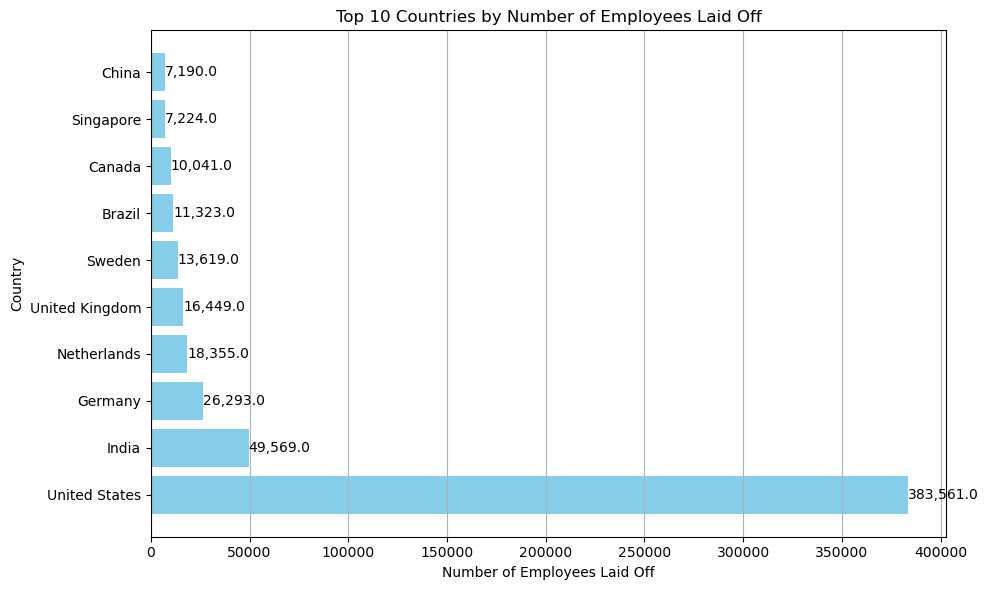

In [80]:
# Top 10 Countries with Most employees Laid off

laid_off_per_country = data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(laid_off_per_country.index, laid_off_per_country.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Employees Laid Off')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

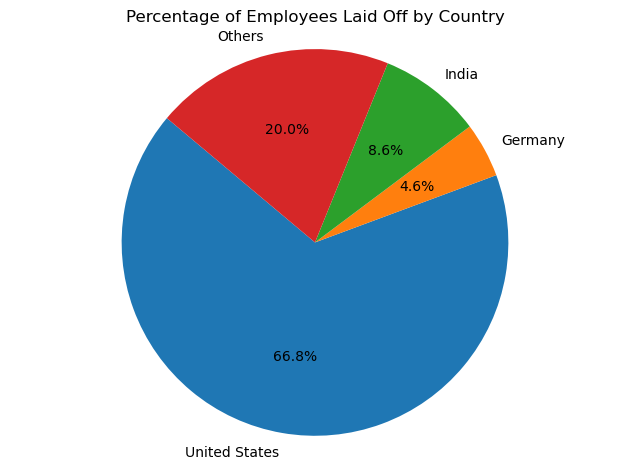

In [102]:
#Looking it in Pie Chart

top_countries = ['United States', 'Germany', 'India']
laid_off_per_country = data.groupby('Country')['Laid_Off_Count'].sum()
other_countries_sum = laid_off_per_country[~laid_off_per_country.index.isin(top_countries)].sum()
laid_off_per_country = laid_off_per_country[top_countries]
laid_off_per_country['Others'] = other_countries_sum
plt.figure()
plt.pie(laid_off_per_country, labels=laid_off_per_country.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Employees Laid Off by Country')
plt.tight_layout()
plt.show()

#Observation: The United Sates has more recession than the entire world combined.

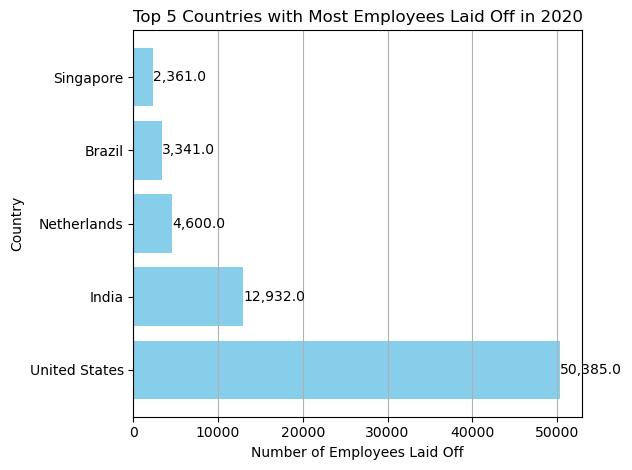

In [81]:
# Filter data for the year 2020

data_2020 = data[data['Year'] == 2020]
laid_off_per_country_2020 = data_2020.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).head(5)
plt.figure()
bars = plt.barh(laid_off_per_country_2020.index, laid_off_per_country_2020.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Country')
plt.title('Top 5 Countries with Most Employees Laid Off in 2020')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

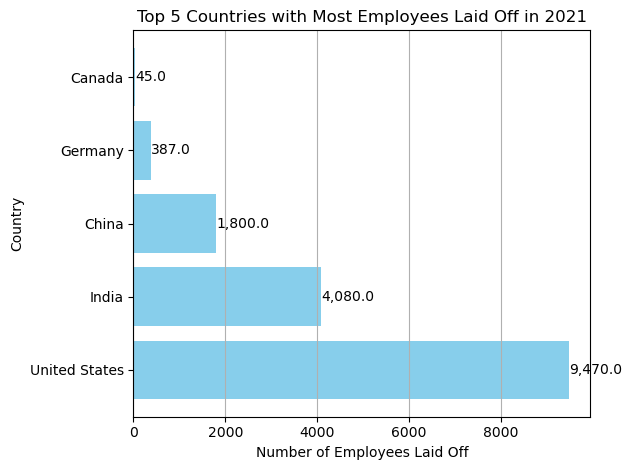

In [82]:
# Filter data for the year 2021

data_2021 = data[data['Year'] == 2021]
laid_off_per_country_2021 = data_2021.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).head(5)
plt.figure()
bars = plt.barh(laid_off_per_country_2021.index, laid_off_per_country_2021.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Country')
plt.title('Top 5 Countries with Most Employees Laid Off in 2021')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

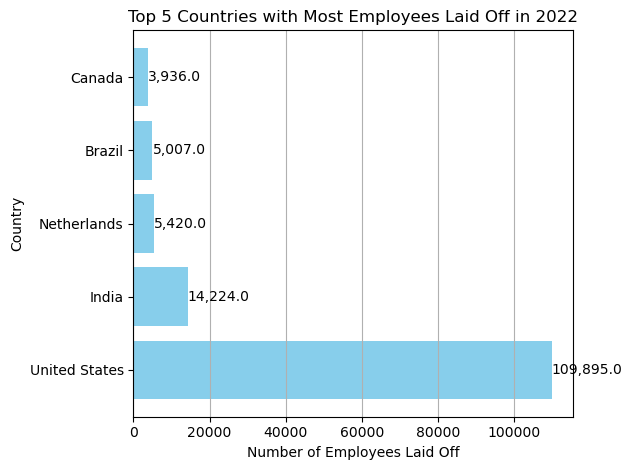

In [83]:
# Filter data for the year 2022

data_2022 = data[data['Year'] == 2022]
laid_off_per_country_2022 = data_2022.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).head(5)
plt.figure()
bars = plt.barh(laid_off_per_country_2022.index, laid_off_per_country_2022.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Country')
plt.title('Top 5 Countries with Most Employees Laid Off in 2022')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

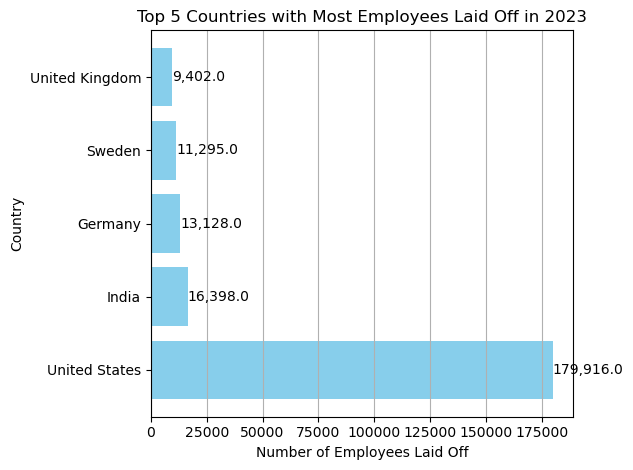

In [84]:
# Filter data for the year 2023

data_2022 = data[data['Year'] == 2023]
laid_off_per_country_2022 = data_2022.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).head(5)
plt.figure()
bars = plt.barh(laid_off_per_country_2022.index, laid_off_per_country_2022.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Country')
plt.title('Top 5 Countries with Most Employees Laid Off in 2023')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

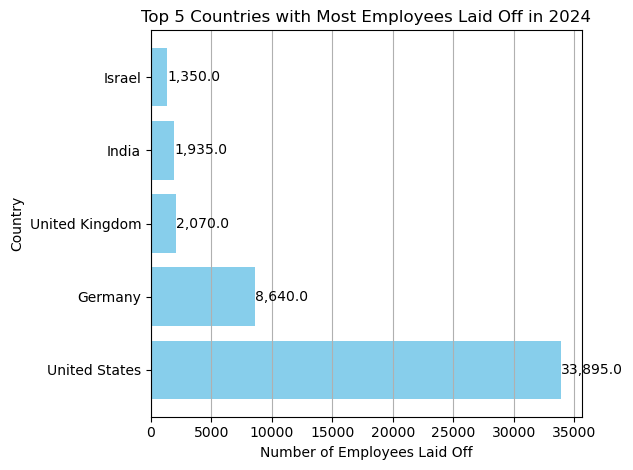

In [85]:
# Filter data for the year 2024

data_2022 = data[data['Year'] == 2024]
laid_off_per_country_2022 = data_2022.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False).head(5)
plt.figure()
bars = plt.barh(laid_off_per_country_2022.index, laid_off_per_country_2022.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Country')
plt.title('Top 5 Countries with Most Employees Laid Off in 2024')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

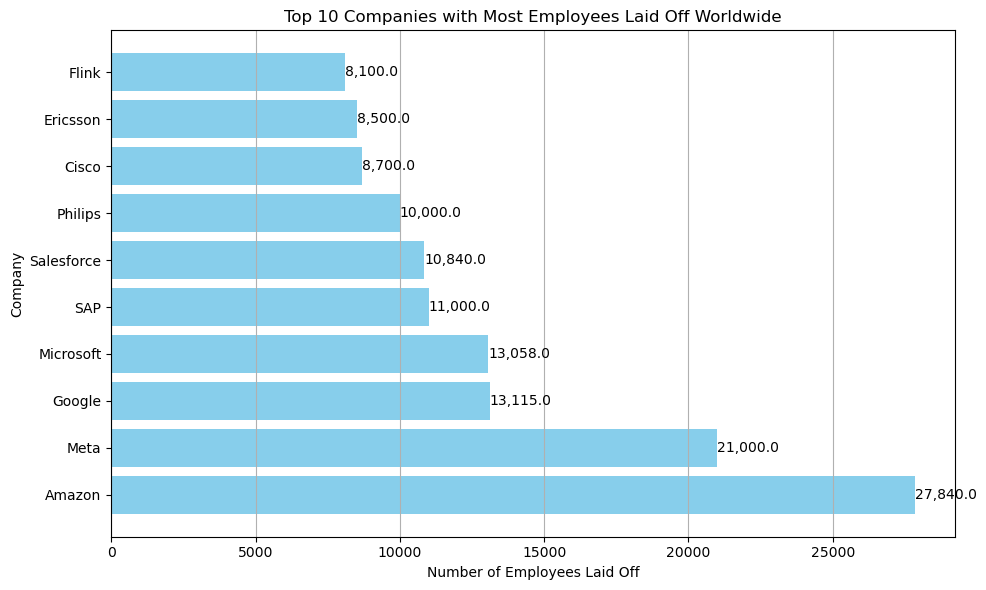

In [91]:
#Top 10 Companies with Most Employees Laid Off Worldwide

laid_off_per_company_worldwide = data.groupby('ï»¿Company')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(laid_off_per_company_worldwide.index, laid_off_per_company_worldwide.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Company')
plt.title('Top 10 Companies with Most Employees Laid Off Worldwide')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

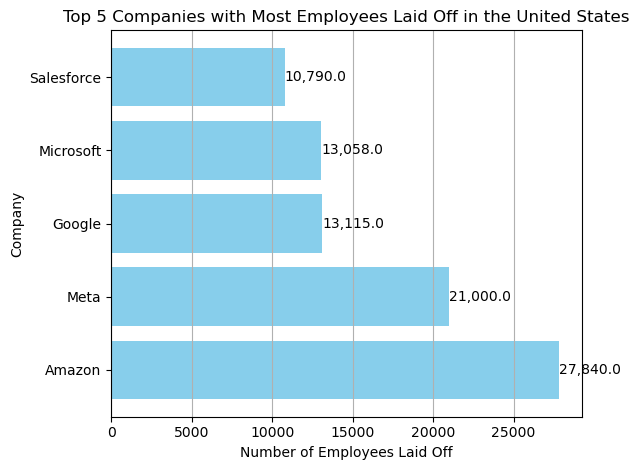

In [93]:
#Since most no.of employees were laid off in USA, finding the top 5 companies that laidoff their employees in USA
#Can change the country name and check for any country

data_usa = data[data['Country'] == 'United States']
laid_off_per_company_usa = data_usa.groupby('ï»¿Company')['Laid_Off_Count'].sum().sort_values(ascending=False).head(5)
plt.figure()
bars = plt.barh(laid_off_per_company_usa.index, laid_off_per_company_usa.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Company')
plt.title('Top 5 Companies with Most Employees Laid Off in the United States')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

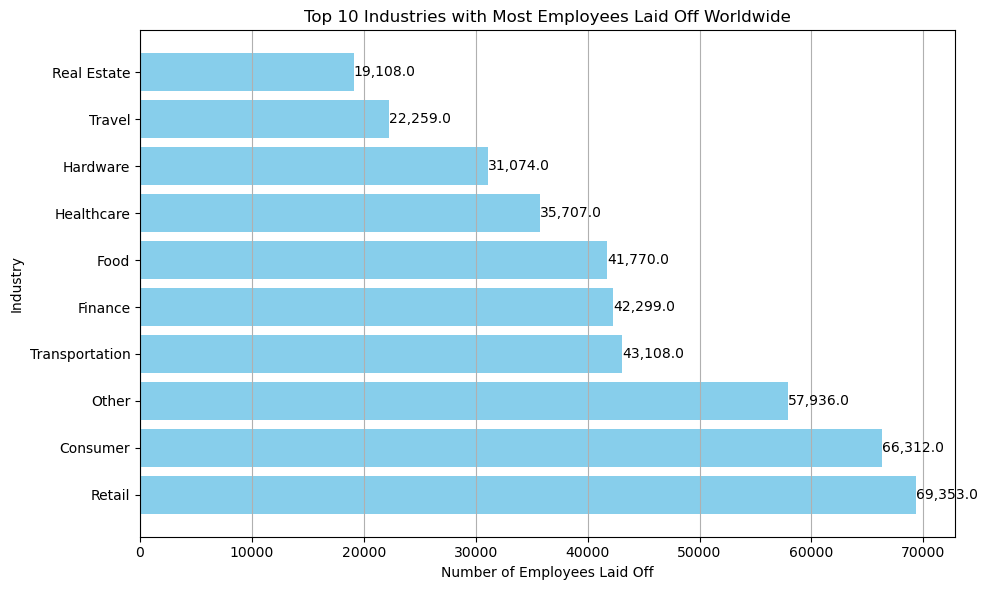

In [104]:
#Top 10 Industries with Most Employees Laid Off Worldwide

laid_off_per_industry = data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(laid_off_per_industry.index, laid_off_per_industry.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Industry')
plt.title('Top 10 Industries with Most Employees Laid Off Worldwide')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

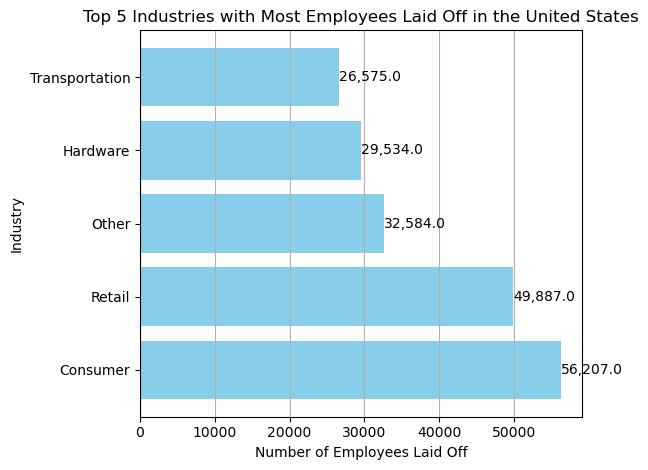

In [106]:
#Top 5 industries with major layoffs USA. Can check for other countries by changing name

data_usa = data[data['Country'] == 'United States']
laid_off_per_industry_usa = data_usa.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).head(5)
plt.figure()
bars = plt.barh(laid_off_per_industry_usa.index, laid_off_per_industry_usa.values, color='skyblue')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:,}', ha='left', va='center')
plt.xlabel('Number of Employees Laid Off')
plt.ylabel('Industry')
plt.title('Top 5 Industries with Most Employees Laid Off in the United States')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [108]:
#In Consumer industry, countries that lost most jobs. Can check for other industries.

consumer_data = data[data['Industry'] == 'Consumer']
layoffs_per_country_consumer = consumer_data.groupby('Country')['Laid_Off_Count'].sum()
top_5_countries = layoffs_per_country_consumer.nlargest(5)
print(top_5_countries)

Country
United States    56207.0
India             3798.0
China             3445.0
Israel            1230.0
Germany            400.0
Name: Laid_Off_Count, dtype: float64


In [122]:
# funds saved in millions by laying off employees. Top 10 companies in USA. Can check for other countries by changing names

data_usa = data[data['Country'] == 'United States']

data_usa['Funds_Saved'] = data_usa['Laid_Off_Count'] * data_usa['Funds_Raised']
funds_saved_per_company = data_usa.groupby('ï»¿Company')['Funds_Saved'].sum()
top_10_companies = funds_saved_per_company.nlargest(10)
top_10_companies_in_millions = top_10_companies / 1000000
top_10_companies_df = pd.DataFrame(top_10_companies_in_millions)
top_10_companies_df.reset_index(inplace=True)
top_10_companies_df.columns = ['Company', 'Funds (in millions)']
print("Top 10 Companies in the United States by Funds Saved after Laying Off Employees:")
print(top_10_companies_df)

Top 10 Companies in the United States by Funds Saved after Laying Off Employees:
        Company  Funds (in millions)
0          Meta             546.0000
1          Uber             170.5300
2         Xerox              81.6000
3       Netflix              61.5595
4       Twitter              50.8260
5        Cruise              14.2950
6          Lyft              13.7886
7  Lucid Motors              10.7900
8        Airbnb              10.4520
9          Snap               9.6530


/var/folders/18/2t8gykdd04x2cxj56n_2xllc0000gn/T/ipykernel_21178/2839412748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['Funds_Saved'] = data_usa['Laid_Off_Count'] * data_usa['Funds_Raised']
